In [2]:
import cv2
import numpy as np
import os
import pandas as pd

from tqdm import tqdm
from glob import glob
from albumentations import RandomCrop, HorizontalFlip, VerticalFlip

from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt

import os

In [9]:
image_path = "../results/predicted_images/predictions_3/"
img = os.path.join(image_path, "002_3.jpg")

In [10]:
x = cv2.imread(img, cv2.IMREAD_GRAYSCALE)

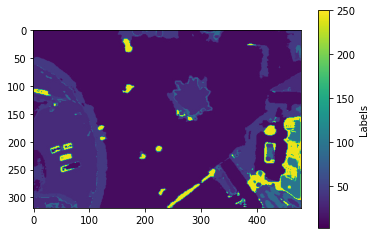

In [11]:
plt.figure()
plt.imshow(x)
plt.colorbar(label="Labels")

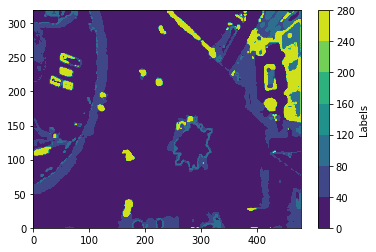

In [27]:
plt.figure()
plt.contourf(x)
plt.colorbar(label="Labels")

# Make Predictions on our own dataset

In [1]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, Callback
from tensorflow.keras.utils import plot_model
import os


# Show GPUs devices
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3845603853313112959
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3660972032
locality {
  bus_id: 1
  links {
  }
}
incarnation: 13027935035535095775
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


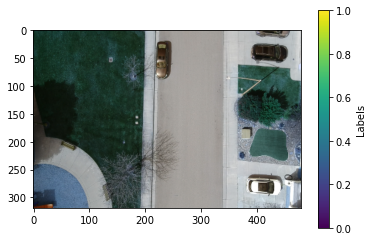

In [14]:
image_path = "../data/"
img = os.path.join(image_path, "drone_pic.PNG")
H = 320
W = 480
x = cv2.imread(img, cv2.IMREAD_COLOR)
x = cv2.resize(x, (W, H))
x = x/255.0
x = x.astype(np.float32)
plt.figure()
plt.imshow(x)
plt.colorbar(label="Labels")

In [15]:
# Load Model
model = tf.keras.models.load_model("../results/models/model_3.h5")

In [29]:
p = model.predict(np.expand_dims(x, axis=0))[0]


In [ ]:
p = np.argmax(p, axis=-1)
p = np.expand_dims(p, axis=-1)  
num_classes = 23
p = p * (255/num_classes)
p = p.astype(np.int32)
p = np.concatenate([p, p, p], axis=2)

In [24]:
cv2.imwrite(f"../results/real_pred.jpg", p)

True

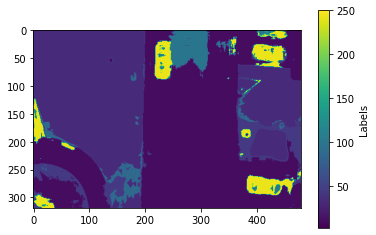

In [25]:
pred = cv2.imread("../results/real_pred.jpg", cv2.IMREAD_GRAYSCALE)

plt.imshow(pred)
plt.colorbar(label="Labels")

In [28]:
p.shape

(320, 480, 3)

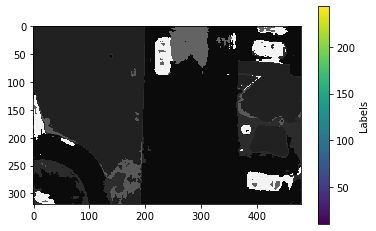

In [23]:
plt.imshow(p, interpolation = 'nearest')
plt.colorbar(label="Labels")